In [ ]:
!pip install nltk

In [11]:
from urllib import request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [12]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = test.set_index('id', drop = True)


In [13]:
# Dropping all rows where text column is NaN
train.dropna(axis=0, how="any", thresh=None, subset=['text'], inplace=True)
test = test.fillna(' ')

# Checking length of each article
length = []
[length.append(len(str(text))) for text in train['text']]
train['length'] = length

# Removing outliers, it will reduce overfitting
train = train.drop(train['text'][train['length'] < 50].index, axis = 0)

In [201]:
# Secluding labels in a new pandas dataframe for supervised learning
train_labels = train['label']
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train['text'], train_labels, test_size=0.2, random_state=0)

# Setting up Term Frequency - Inverse Document Frequency Vectorizer
#tfidf = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
tfidf = TfidfVectorizer(stop_words = 'english', max_features=2000)
# Fit and transform training set and transform test set
tfidf_train = tfidf.fit_transform(x_train) 
tfidf_test = tfidf.transform(x_test)
tfidf_test_final = tfidf.transform(test['text'])

In [202]:
X_train = pd.DataFrame(tfidf_train.toarray())
X_test = pd.DataFrame(tfidf_test.toarray())

In [214]:
clf = SVC(kernel = 'linear',tol = 1)
model = clf.fit(X_train, y_train)

In [215]:
y_train_pred= model.predict(X_train)
y_test_pred=model.predict(X_test)
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print("Train : {}, Test: {}".format(train_accuracy,test_accuracy))

Train : 0.9637535729489752, Test: 0.9438092921430309


In [216]:
f1score=f1_score(y_train, y_train_pred)

In [217]:
print(f1score)

0.9635295557459308
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8303
           1       0.96      0.97      0.96      8140

    accuracy                           0.96     16443
   macro avg       0.96      0.96      0.96     16443
weighted avg       0.96      0.96      0.96     16443



In [218]:
prec=precision_score(y_train, y_train_pred, average='weighted')
print(prec)

0.9637826563034471


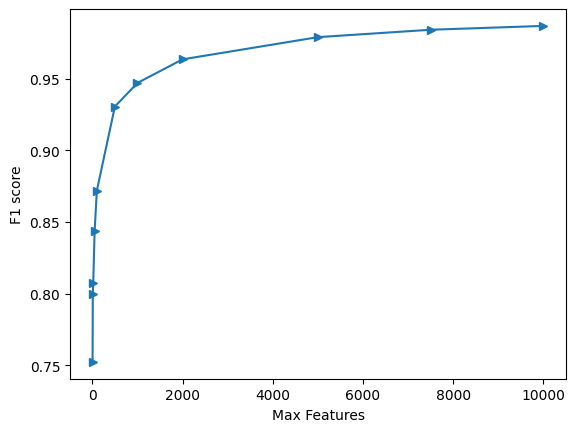

In [219]:
# feature_x=[5,10,20,50,100,500,1000,2000,5000,7500,10000]
# f1score_y=[0.7522955257151956,0.7997867235403893,0.8076039273031127,0.8434055694584953,0.8719534958135566,0.9306802206120904,0.9471628512531192,0.9636353753329348,0.979140569685747,0.9843154340485786,0.9869818617571763]
# # Function to plot
# plt.plot(feature_x,f1score_y,marker=">")
# plt.xlabel("Max Features")
# plt.ylabel("F1 score")
# # function to show the plot
# # plt.show()
# plt.savefig("feature_to_f1.png")